# Dupuit-Thiem well flow solution with uniform recharge

Installed `PyGAF` testing.

In [ ]:
import os
import pygaf

Local testing.

In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../pygaf'))
import pygaf

Help.

In [ ]:
help(pygaf.DupuitThiemWell())

## `DupuitThiemWell` class
Instanciate a `DupuitThiemWell` solution object and display the object information.

In [2]:
TW = pygaf.DupuitThiemWell()
TW.info()

METHOD REFERENCE
----------------
Conceptual Model:
- Infinite, uniform and homogeneous aquifer.
- Dupuit–Forchheimer assumption (relatively flat water table.
- Steady state radial groundwater flow.
- Steady state and fully penetrating well.
- Uniform groundwater recharge.



The aquifer and well objects of the solution have `PyGAF` default values that are accessed via the `.aq` and `.well` attributes of the solution object.

Change selected solution inputs.

In [3]:
TW.aq.name = 'Aquifer 1'
TW.aq.K = 2.1
TW.aq.Ss = 0.001
TW.aq.B = 20
TW.aq.bot = 120
TW.well.name = 'Well 1'
TW.well.q = -500

Display information for the aquifer and well objects using the `.info` methods.

In [4]:
TW.aq.info()
TW.well.info()

AQUIFER INFORMATION
-------------------
Type: 2D, confined homogeneous aquifer
Name: Aquifer 1
Hydraulic conductivity: 2.1 [L/T]
Specific storativity: 0.001 [1/L]
Aquifer thickness: 20 [L]
Transmissivity: 42.0 [L2/T]
Storage coefficient: 0.02 [1]
Diffusivity: 2100.0 [L2/T]
Bottom elevation: 120 [RL]
Top elevation: 140 [RL]

WELL INFORMATION
----------------
Type: Steady state
Name: Well 1
Coordinates: 0.0 , 0.0
Radius: 0.05 [L]
Penetration: 1
Well rate: -500 [L3/T]
State: extract



A drawing of the aquifer can be displayed using the `.draw` method of the aquifer object.

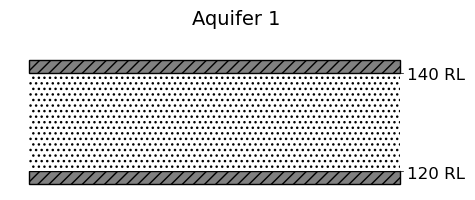

In [5]:
TW.aq.draw()

## Radial drawdown `.dd` method
The `.dd` method calculates drawdown at each radius value specified in a list. Radius values are sorted in ascending order prior to evaluation. The results plot can be suppressed by setting `plot=False`. The method returns a pandas dataframe with radius values as the row index and displacement values in a single column.

Aquifer transmissivity: 42.0
Pumping rate: -500
Radius of influence: 1262.0


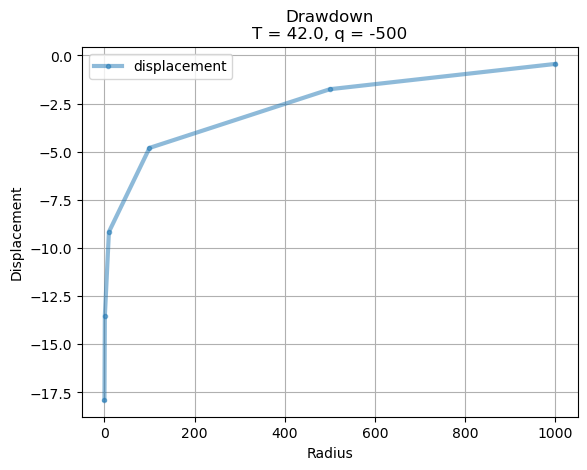

        displacement
Radius              
0.1       -17.891089
1.0       -13.528377
10.0       -9.165665
100.0      -4.802953
500.0      -1.753549
1000.0     -0.440242


In [6]:
DR = [0.1, 1, 10, 1000, 500, 100]
DD = TW.dd(r=DR)
print(DD)

Results are exported to csv and Excel files if non-blank strings are set for the `.csv` and `.xlsx` attributes. File names are supplied with or without their file extentions, which will be added if they are ommitted.

In [7]:
OFILE = os.path.join('output', 'dd_results')
DD = TW.dd(r=DR, csv=OFILE, xlsx=OFILE, plot=False)

Aquifer transmissivity: 42.0
Pumping rate: -500
Radius of influence: 1262.0
Results exported to: output/dd_results.csv
Results exported to: output/dd_results.xlsx


## Gridded drawdown `.dd_grid` method
The `dd_grid` method evaluates drawdown within the radius of influence on a grid of points. The method returns drawdown in a Pandas dataframe with columns x, y and drawdown. A plot of results is displayed as default and can be suppressed by setting `plot=False`.

Unless otherwise specified, the solution uses the default well density 21 (441 grid points consisting of 21 rows and 21 columns). Other values can be specified via the grid object of the solution using the `gd` attributes. The well grid radius is set equal to the radius of influence.

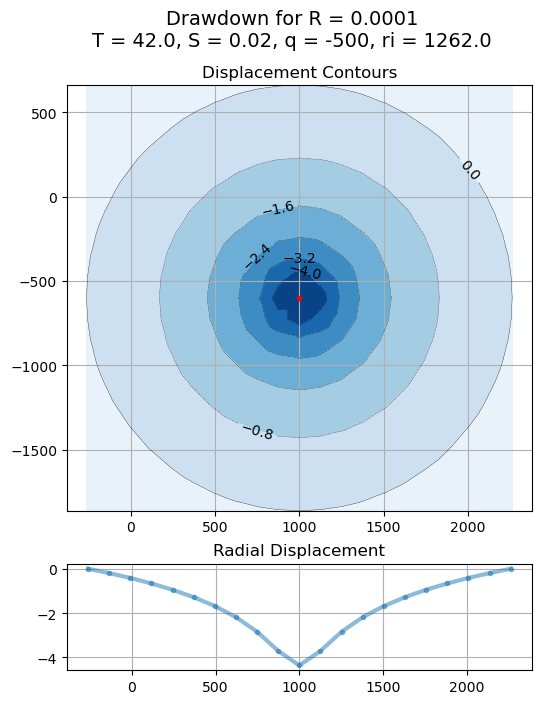

In [9]:
TW.well.x = 1000
TW.well.y = -600
DDG = TW.dd_grid()

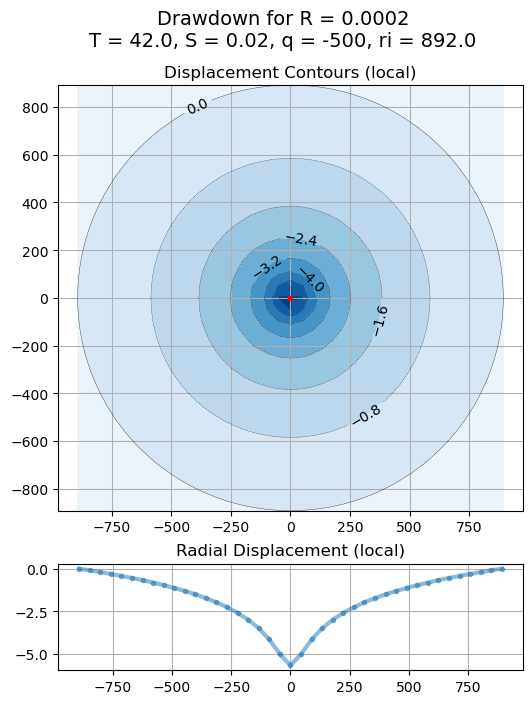

In [10]:
TW.grid.gd = 50
TW.R = 2e-4
DDG = TW.dd_grid(local=True)

Drawdown results are exported to csv and Excel files if non-blank strings are set for the `.csv` and `.xlsx` attributes. File names are supplied with or without their file extentions, which will be added if they are ommitted.

In [11]:
OFILE = os.path.join('output', 'dd_grid_results')
DDG = TW.dd_grid(csv=OFILE, xlsx=OFILE, plot=False)

Results exported to: output/dd_grid_results.csv
Results exported to: output/dd_grid_results.xlsx
